In [5]:
from scipy.stats import binom
import numpy as np
from empiricaldist import Pmf

4.2. The Binomial Distribution

In [2]:
n = 2
p = 0.5
k = 1

binom.pmf(k, n, p)

np.float64(0.5000000000000002)

In [4]:
ks = np.arange(n+1)

ps = binom.pmf(ks, n, p)
ps

array([0.25, 0.5 , 0.25])

In [6]:
pmf_k = Pmf(ps, ks)
pmf_k

,probs
0,0.25
1,0.50
2,0.25


In [9]:
def make_binomial(n, p):
    ks = np.arange(n+1)
    ps = binom.pmf(ks, n, p)
    return Pmf(ps, ks)


In [10]:
pmf_k = make_binomial(n=250, p=0.5)


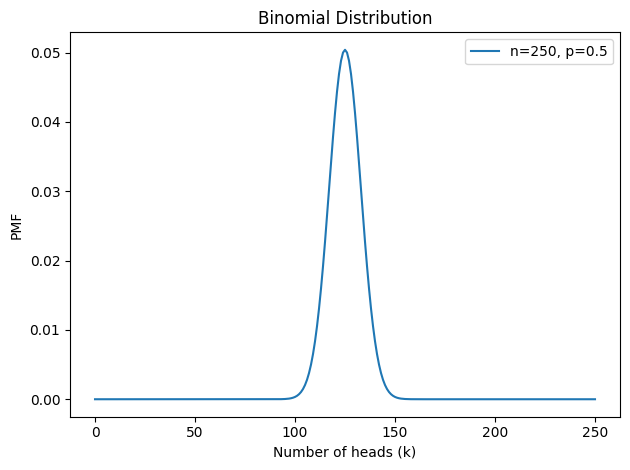

In [15]:
from utils import decorate
pmf_k.plot(label='n=250, p=0.5')
decorate(xlabel='Number of heads (k)',
         ylabel='PMF',
         title='Binomial Distribution')

In [16]:
pmf_k.max_prob()

np.int64(125)

In [17]:
pmf_k[125]

np.float64(0.050412213147309655)

In [18]:
pmf_k[140]

np.float64(0.008357181724918188)

In [19]:
def prob_ge(pmf, threshold):
    ge = pmf.qs >= threshold
    total = pmf[ge].sum()
    return total

In [20]:
prob_ge(pmf_k, 140)

np.float64(0.03321057562002166)

In [21]:
pmf_k.prob_ge(140)

np.float64(0.03321057562002166)

4.3. Bayesian Estimation

In [22]:
hypos = np.linspace(0, 1, 101)
prior = Pmf(1, hypos)

In [24]:
likelihood_heads = hypos
likelihood_tails = 1 - hypos

In [25]:
likelihood = {
    'H': likelihood_heads,
    'T': likelihood_tails,
}

In [26]:
dataset = 'H' * 140 + 'T' * 110

In [27]:
def update_euro(pmf, dataset):
    for event in dataset:
        pmf *= likelihood[event]
    pmf.normalize()

In [28]:
posterior = prior.copy()
update_euro(posterior, dataset)

In [29]:
def decorate_euro(title):
    decorate(xlabel='Proportion of heads (x)',
             ylabel='Probability',
             title=title)
    

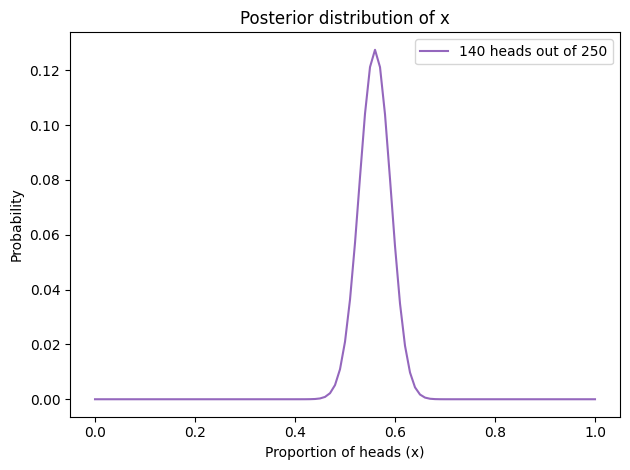

In [30]:
posterior.plot(label='140 heads out of 250', color='C4')
decorate_euro(title='Posterior distribution of x')

In [31]:
posterior.max_prob()

np.float64(0.56)

4.4. Triangle Prior

In [32]:
# skipping this section

4.5. The Binomial Likelihood Function

In [33]:
def update_binomial(pmf, data):
    k, n = data
    xs = pmf.qs
    likelihood = binom.pmf(k, n, xs)
    pmf *= likelihood
    pmf.normalize()

In [34]:
uniform2 = Pmf(1, hypos, name='uniform2')
data = 140, 250
update_binomial(uniform2, data)

In [35]:
uniform2

,probs
0.00,0.000000e+00
0.01,1.256330e-207
0.02,5.731921e-166
0.03,8.338711e-142
0.04,8.269265e-125
...,...
0.96,2.107677e-83
0.97,1.624102e-96
0.98,2.911941e-115
0.99,9.293081e-148


4.6. Bayesian Statistics

Bayes’s Theorem is a mathematical law of probability; no reasonable person objects to it. But Bayesian statistics is surprisingly controversial. Historically, many people have been bothered by its subjectivity and its use of probability for things that are not random.